In [1]:
#imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [22]:
pip install -U kaleido


   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB 435.7 kB/s eta 0:02:32
   ---------------------------------------- 0.1/65.9 MB 1.0 MB/s eta 0:01:04
   ---------------------------------------- 0.4/65.9 MB 2.6 MB/s eta 0:00:26
    --------------------------------------- 0.8/65.9 MB 4.4 MB/s eta 0:00:15
    --------------------------------------- 1.3/65.9 MB 5.6 MB/s eta 0:00:12
   - -------------------------------------- 1.8/65.9 MB 6.6 MB/s eta 0:00:10
   - -------------------------------------- 2.5/65.9 MB 7.6 MB/s eta 0:00:09
   - -------------------------------------- 2.9/65.9 MB 8.0 MB/s eta 0:00:08
   - -------------------------------------- 3.1/65.9 MB 7.4 MB/s eta 0:00:09
   -- ------------------------------------- 3.7/65.9 MB 8.1 MB/s eta 0:00:08
   -- ------------------------------------- 4.2/65.9 MB 8.4 MB/s eta 0:00:08
   -- ----

In [3]:
#load dataset
df = pd.read_csv("contestants.csv")

In [ ]:
#drop unnecessary columns
df = df.drop(columns = ["hometown", "poc", "num_appearance", "birthdate", "votes_against", "tribe1",
                   "tribe2", "tribe3", "quit", "evac", "ejected", "fmc", "num_jury_votes"], axis = 1)

In [6]:
#create age category column
bins = [17, 24, 29, 34, 39, 44, 49, 54, 59, 100]
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60+"]

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels)

In [7]:
#create column stating if contestant won
def winner(row):
    if row["normalized_finish"] > 0.93:
        return "Yes"
    else:
        return "No"
df["winner"] = df.apply (lambda row: winner(row), axis = 1)

In [8]:
#drop unnecessary columns
df = df.drop(columns = ["finish", "normalized_finish"], axis = 1)

In [9]:
#make a copy
all_cast = df.copy()

In [10]:
#replace with binary encoding with 'No' and 'Yes'
all_cast[["african_american", "asian_american", "latin_american", "jewish", "muslim", "lgbt", "merge", "jury", "ftc"]] = all_cast[["african_american", "asian_american",
                                                                                                "latin_american", "jewish", "muslim", "lgbt", "merge",
                                                                                                                                  "jury", "ftc"]].replace({0: "No", 1 : "Yes"})

In [11]:
#create row stating if contestant was the first contestant eliminated
def first_boot(row):
    if row["num_boot"] == 1:
        return "Yes"
    else:
        return "No"
all_cast["first_boot"] = all_cast.apply (lambda row: first_boot(row), axis = 1)

In [11]:
#look at the different professions
all_cast["profession"].unique()

array(['Musician/Retired Teacher', 'Real Estate Developer', 'Attorney',
       'Biochemist', 'Dairy Farmer', 'Health Club Consultant', 'Teacher',
       'Ivy League Graduate', 'Student', 'YMCA Basketball Coach',
       'Neurologist', 'Truck Driver', 'Retired NAVY Seal',
       'River Rafting Guide', 'Corporate Trainer', 'Corrections Officer',
       'Army Intelligence Officer', 'Retired Police Officer',
       'Singer/Songwriter', 'Bartender', 'Software Publisher',
       'Internet Projects Manager', 'Personal Trainer',
       'Aspiring Actress', 'Law Student', 'Administrative Assistant',
       'Teacher/Farmer', 'Footwear Designer', 'Chef', 'Auto Customizer',
       'Personal Nurse', 'Mail Carrier', 'Sheriff', 'Dentist',
       'Career Counselor', 'Advertising Executive', 'Basketball Coach',
       'Behavior Analyst', 'Telephone Technician', 'Freelance Marketer',
       'Flight Attendant', 'Goat Farmer', 'Marketing Manager',
       'Retired Teacher', 'Professional Soccer Player',
    

In [12]:
#create groups for some common professions - lawyers & judges, doctors & dentists, educators, and police officers & military veterans
all_cast.loc[all_cast['profession'].str.contains('lawyer|judge|attorney|law student', case=False, na=False), 'Law'] = "Yes"
all_cast.loc[all_cast['profession'].str.contains('doctor|neurologist|dentist|surgeon|physician|anesthesiologist', case=False, na=False), 'MD/DDS'] = "Yes"
all_cast.loc[all_cast['profession'].str.contains('teacher|principal|professor', case=False, na=False), 'Educator'] = "Yes"
all_cast.loc[all_cast['profession'].str.contains('Navy|Army|Corrections|Police|Ex-Navy|detective|LAPD|NYPD|military|veteran', case=False, na=False), 'Law Enforcement/Military'] = "Yes"

In [12]:
#create 'nan' with 'No'
all_cast.replace({ "nan" : "No"}, inplace = True)

In [13]:
#dataframe with all of the first boots
first_boots = all_cast[all_cast["first_boot"] == "Yes"]

In [14]:
#dataframe with all of the winners
winners = all_cast[all_cast["winner"] == "Yes"]

In [15]:
#create dataframe with the count and percentage of all contestants by gender
count = all_cast["gender"].value_counts()
percentage = all_cast["gender"].value_counts(normalize = True)
all_gender = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()


In [16]:
#create dataframe with the count and percentage of all first boots by gender
count = first_boots["gender"].value_counts()
percentage = first_boots["gender"].value_counts(normalize = True)
boots_gender = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [17]:
#create dataframe with the count and percentage of all winners by gender
count = winners["gender"].value_counts()
percentage = winners["gender"].value_counts(normalize = True)
winners_gender = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [18]:
#replace M & F with 'Male' and 'Female' 
dfs = [all_gender, boots_gender, winners_gender]
for df in dfs:
    df["gender"] = df["gender"].replace({"M" : "Male", "F" : "Female"})

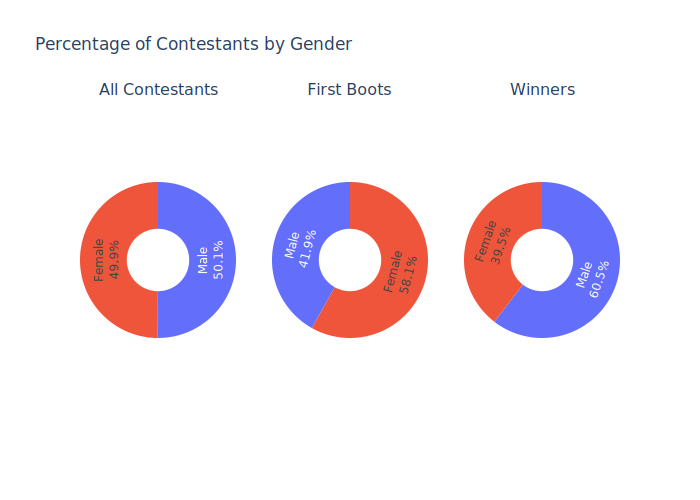

In [19]:
#create pie charts for gender distribution of all contestants, first boots, and winners
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles = ["All Contestants", "First Boots", "Winners"])

fig.add_trace(go.Pie( labels = all_gender["gender"], values = all_gender["percentage"], customdata = all_gender["count"], textinfo = "label+percent", showlegend = False)
              ,row=1, col=1)

fig.add_trace(go.Pie ( labels = boots_gender["gender"] , values = boots_gender["percentage"], customdata = boots_gender["count"], textinfo = "label+percent", showlegend = False),
              row = 1, col = 2)
fig.add_trace(go.Pie(labels = winners_gender["gender"], values = winners_gender["percentage"], customdata = winners_gender["count"],  textinfo = "label+percent", showlegend = False),
                     row = 1, col = 3)
fig.update_traces(hole=0.4, hovertemplate = "<b>Gender<b>: %{label}<br>"
                                    "<b>Proportion<b>: %{value:.3f}<br>"
                                    "<b>Count<b>: %{customdata}<br>"
                                     "<extra></extra>")

fig.update_layout(title_text="Percentage of Contestants by Gender")

Gender for all contestants is almost a 50-50 split. However, female contestants make up 58% percent of first boots and 39.5% percent of winners.

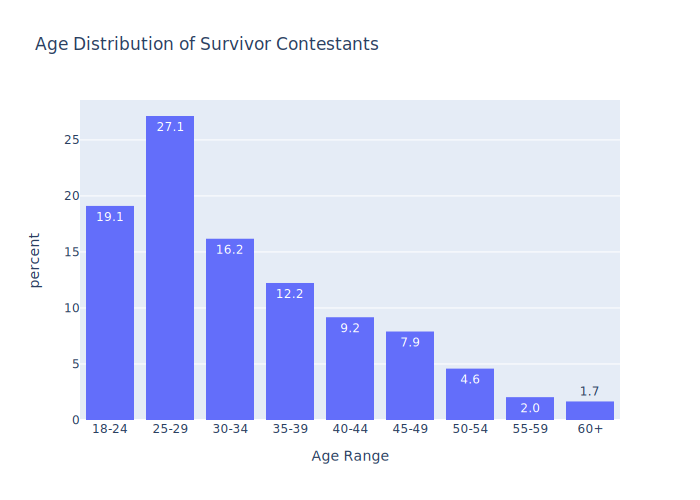

In [20]:
#create graph showing the age distribution of all contestants
all_cast = all_cast.sort_values(by="age_category")
fig = px.histogram(all_cast, x = "age_category", title = "Age Distribution of Survivor Contestants", histnorm = "percent",
                  text_auto = '.1f', labels = {"age_category" : "Age Range"})
fig.show()

25-29 is the most common age demographic on Survivor, and a little over 46% of all contestants are in the 18-29 age range.
Representation decreases steadily starting with 30, and players 50 years or older make up less than 10 percent of all contestants.

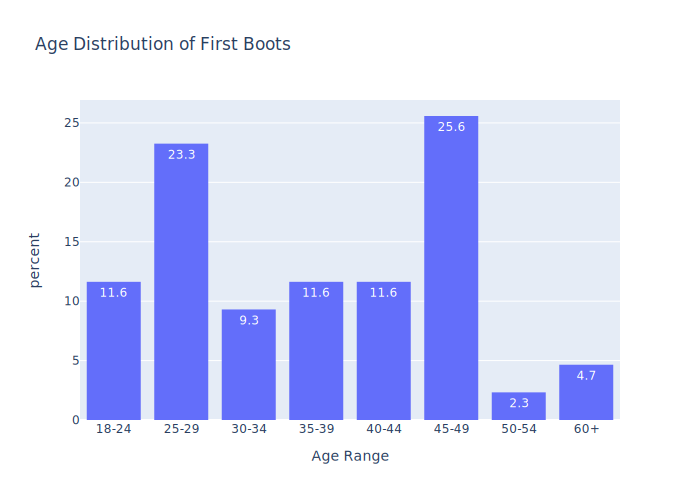

In [21]:
#create graphing showing age distribution of first boots
first_boots = first_boots.sort_values(by="age_category")
fig = px.histogram(first_boots, x = "age_category", title = "Age Distribution of First Boots", histnorm = "percent",
                  text_auto = '.1f', labels = {"age_category" : "Age Range"})
fig.show()

The two most common age ranges of players eliminated first are 25-29 and 45-49. However, even those 25-29 year olds make up 23.3% of first boots,
that is still slightly less than their percentage of the entire cast (27.1%). Age ranges under 40 all make up a smaller percentage of first boots than they do of the entire cast. 45-49 year olds make up the greatest percentage of first boots (25.6%), despite being only 7.9% of the cast. Players in their 40s and 60+ make up a higher percentage of first boots than the entire cast.

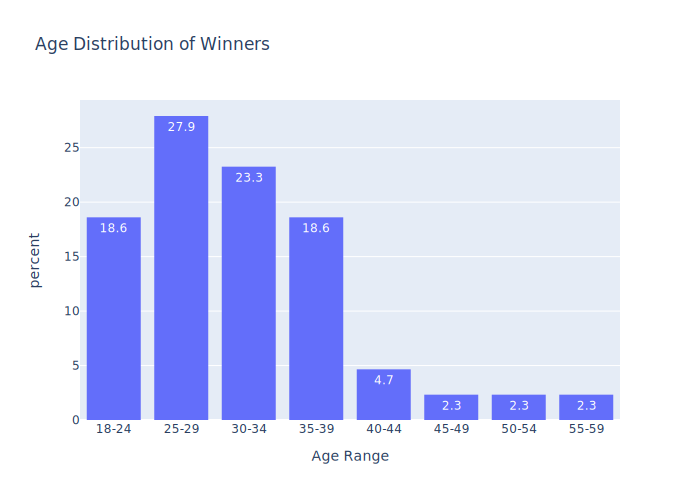

In [22]:
#create graph showing age distribution of winners
winners = winners.sort_values(by="age_category")
fig = px.histogram(winners, x = "age_category", title = "Age Distribution of Winners", histnorm = "percent",
                  text_auto = '.1f', labels = {"age_category" : "Age Range"})
fig.show()

Players in their 30s do well relative to their representations, while players in their 40s do worse. The age distribution for winners 18-29 is similar to the distribution among the entire cast.

In [23]:
#create dataframe with the count and percentage of all contestants by gender & age
ag_count = all_cast.groupby(by="gender")["age_category"].value_counts()
ag_percentage = all_cast.groupby(by="gender")["age_category"].value_counts(normalize = True)
cast_ag = pd.concat([ag_count, ag_percentage], axis=1, keys=['count', 'percentage']).reset_index().sort_values(by="age_category")


In [24]:
#create dataframe with the count and percentage of all first boots by gender & age
ag_count = first_boots.groupby(by="gender")["age_category"].value_counts()
ag_percentage = first_boots.groupby(by="gender")["age_category"].value_counts(normalize = True)
first_ag = pd.concat([ag_count, ag_percentage], axis=1, keys=['count', 'percentage']).reset_index().sort_values(by="age_category")


In [25]:
#create dataframe with the count and percentage of all winners by gender & age
ag_count = winners.groupby(by="gender")["age_category"].value_counts()
ag_percentage = winners.groupby(by="gender")["age_category"].value_counts(normalize = True)
winner_ag = pd.concat([ag_count, ag_percentage], axis=1, keys=['count', 'percentage']).reset_index().sort_values(by="age_category")


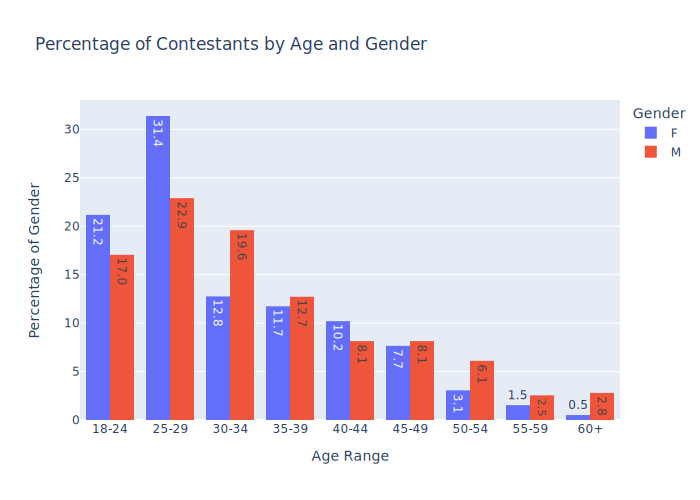

In [26]:
#create showing showing distribution of entire cast by gender and age
fig = px.histogram(cast_ag, x = "age_category", y = "percentage",  color = "gender", title = "Percentage of Contestants by Age and Gender",
                  text_auto = '.1f', barmode = "group", histnorm = "percent", labels = {"age_category" : "Age Range",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage of Gender") 
fig.show()

Women under 30 are more common on the show than men under 30, while men in their 30s are more common than women in their 30s. Men over 50 are almost more likely to appear than women over 50.

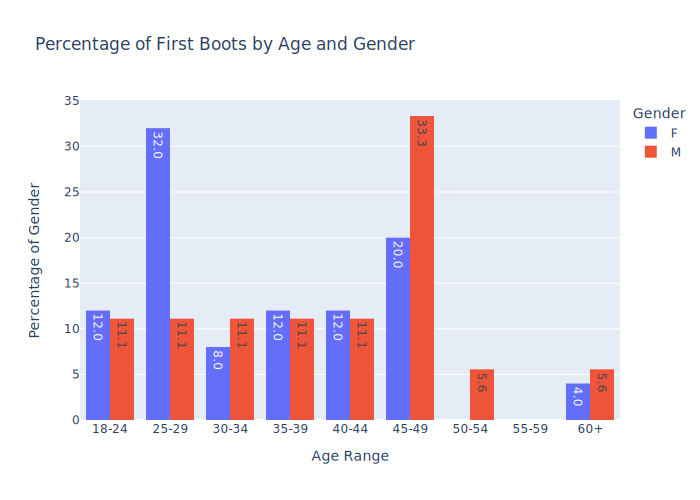

In [27]:
#make a graph to show the distribution of first boots by age and gender
fig = px.histogram(first_ag, x = "age_category", y = "percentage",  color = "gender", title = "Percentage of First Boots by Age and Gender",
                  text_auto = '.1f', barmode = "group", histnorm = "percent", labels = {"age_category" : "Age Range",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage of Gender") 
fig.show()

Women aged 25-29 make up 32 percent of female boots, but 31.4 percent of the female cast. Their male counterparts only make up 11.1 percent of the first boots, but are almost 23 percent of the male cast. Contestants age 45-49 and 60+ for both genders make up a much greater percentage of first boots. Men ages 45-49 are one-third of the male first boots, but only 8 percent of the male cast. Women 45-49 are only 7.7 percent of the female cast, but 20 percent of the female first boots.

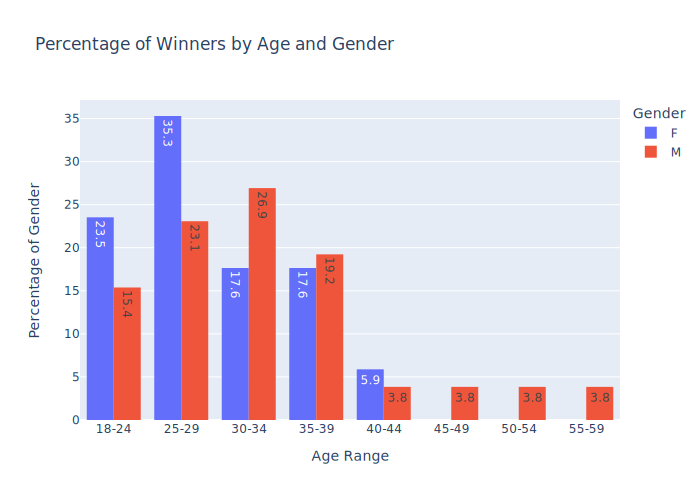

In [28]:
#distribution of winners by age & gender
fig = px.histogram(winner_ag, x = "age_category", y = "percentage",  color = "gender", title = "Percentage of Winners by Age and Gender",
                  text_auto = '.1f', barmode = "group", histnorm = "percent", labels = {"age_category" : "Age Range",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage of Gender") 
fig.show()

Winners skew younger and male. No woman 45 or older has won on survivor. Contestants in their 30s for both gender perform well relative to representation. 

In [29]:
#create dataframe with the count and percentage of all contestants by race
count = all_cast["african_american"].value_counts()
percentage = all_cast["african_american"].value_counts(normalize = True)
af_am = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [30]:
#create dataframe with the count and percentage of first boots by race
count = first_boots["african_american"].value_counts()
percentage = first_boots["african_american"].value_counts(normalize = True)
af_am2 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [31]:
#create dataframe with the count and percentage of all winners by race
count = winners["african_american"].value_counts()
percentage = winners["african_american"].value_counts(normalize = True)
af_am3 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

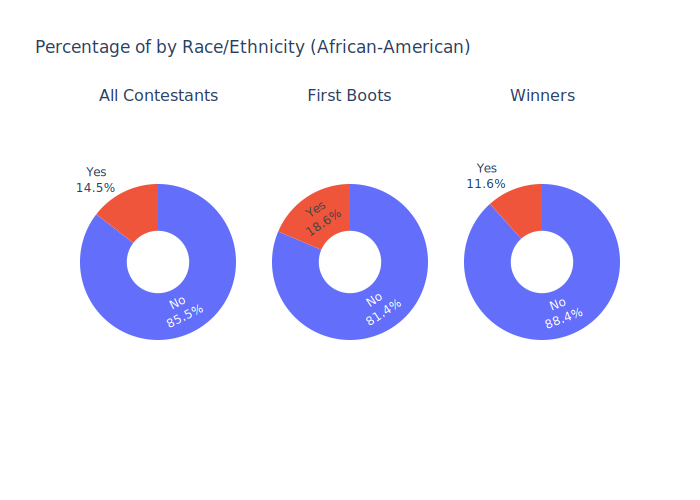

In [32]:
#create pie chart showing distribution of african-americans among the entire cast, first boots, and winners
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles = ["All Contestants", "First Boots", "Winners"])

fig.add_trace(go.Pie( labels = af_am["african_american"], values = af_am["percentage"], customdata = af_am["count"]),
              row=1, col=1)

fig.add_trace(go.Pie ( labels = af_am2["african_american"] , values = af_am2["percentage"], customdata = af_am2["count"]),
              row = 1, col = 2)
fig.add_trace(go.Pie(labels = af_am3["african_american"], values = af_am3["percentage"], customdata = af_am3["count"]),
                     row = 1, col = 3)
fig.update_traces(hole=0.4, hovertemplate = "<b>African_American?<b>: %{label}<br>"
                                    "<b>Proportion<b>: %{value:.3f}<br>"
                                    "<b>Count<b>: %{customdata}<br>"
                                     "<extra></extra>", textinfo = "label+percent", showlegend = False)

fig.update_layout(title_text="Percentage of by Race/Ethnicity (African-American)")

African-American/Black contestants comprise 14.5 percent of all contestants, 18.6 percent of all first boots, and 11.6 percent
of all winners.

In [33]:
#create dataframes showing distribution by race and gender
ag_afam_all = all_cast.groupby(by="gender")["african_american"].value_counts(normalize=True).to_frame().reset_index()
ag_afam_all = ag_afam_all[ag_afam_all["african_american"] == "Yes"]
ag_afam_first = first_boots.groupby(by="gender")["african_american"].value_counts(normalize=True).to_frame().reset_index()
ag_afam_first = ag_afam_first[ag_afam_first["african_american"] == "Yes"]
ag_afam_winner = winners.groupby(by="gender")["african_american"].value_counts(normalize=True).to_frame().reset_index()
ag_afam_winner = ag_afam_winner[ag_afam_winner["african_american"] == "Yes"]


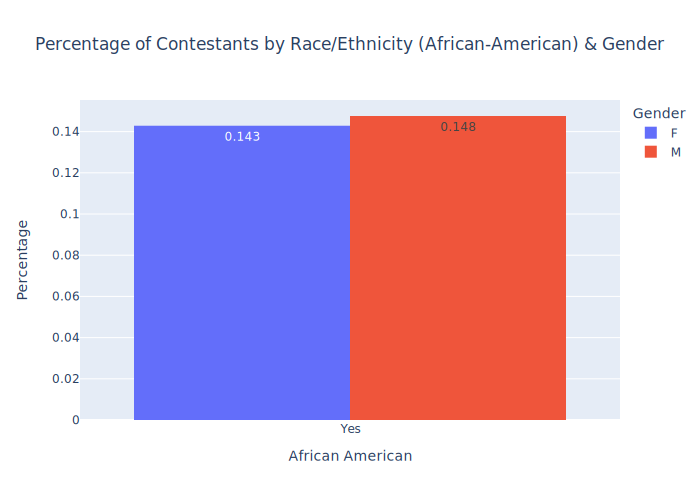

In [34]:
#create graph showing distribution of african-americans by gender
fig = px.histogram(ag_afam_all, x = "african_american", y= "proportion",  color = "gender", title = "Percentage of Contestants by Race/Ethnicity (African-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

African-American/Black contestants are even distributed among the male and female cast.

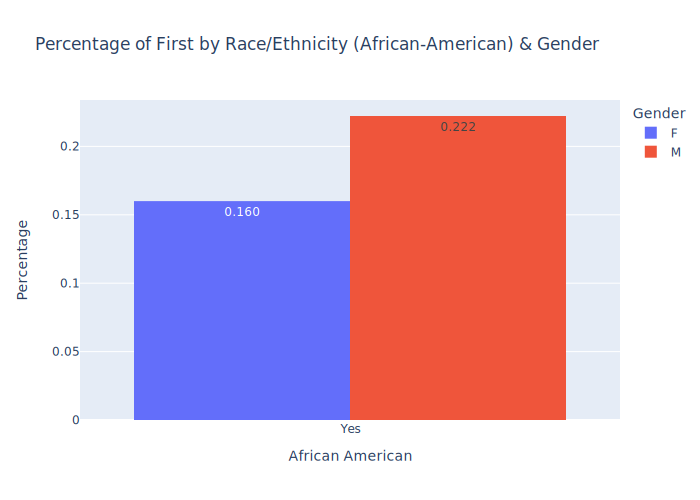

In [35]:
#create graph showing distribution of first-boots by race and gender
fig = px.histogram(ag_afam_first, x = "african_american", y= "proportion",  color = "gender", title = "Percentage of First by Race/Ethnicity (African-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

African-American/Black contestants are slighly more prevalant among first boots. Black male contestants make up 22 percent of the
male first boots, while black female contestants make up 16 percent of the female first boots.

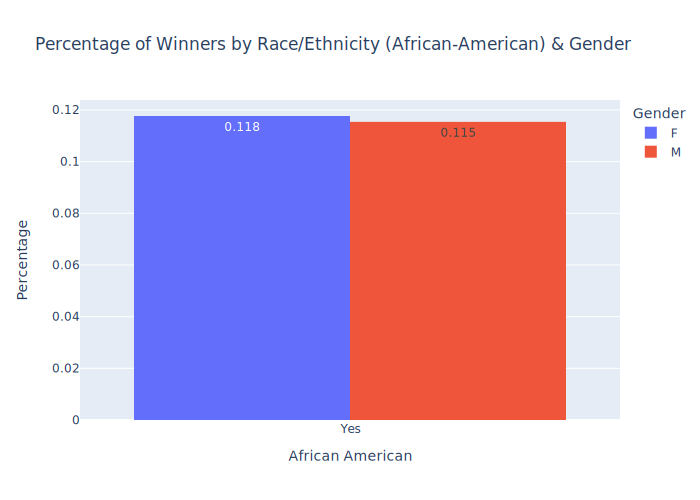

In [36]:
#graph showing distribution of winners by race and gender
fig = px.histogram(ag_afam_winner, x = "african_american", y= "proportion",  color = "gender", title = "Percentage of Winners by Race/Ethnicity (African-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

Winners are evenly distributed among male and female black contestants. 

In [37]:
#create dataframes to show distribution of race and age
age_afam_all = all_cast.groupby(by="age_category")["african_american"].value_counts(normalize=True).to_frame().reset_index()
age_afam_all = age_afam_all[age_afam_all["african_american"] == "Yes"]
age_afam_first = first_boots.groupby(by="age_category")["african_american"].value_counts(normalize=True).to_frame().reset_index()
age_afam_first = age_afam_first[age_afam_first["african_american"] == "Yes"]
age_afam_winner = winners.groupby(by="age_category")["african_american"].value_counts(normalize=True).to_frame().reset_index()
age_afam_winner = age_afam_winner[age_afam_winner["african_american"] == "Yes"]

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\3510767461.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\3510767461.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\3510767461.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



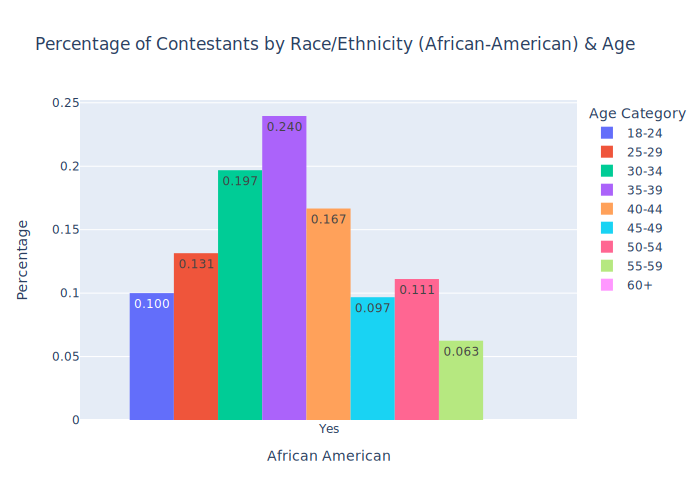

In [38]:

fig = px.histogram(age_afam_all, x = "african_american", y= "proportion",  color = "age_category", title = "Percentage of Contestants by Race/Ethnicity (African-American) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

African-Americans are overrepresented, relative to total cast percentage, among 30-34 year old contestants. They are most
represented among 35-39 years, where they comprise 24 percent of contestants.

C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



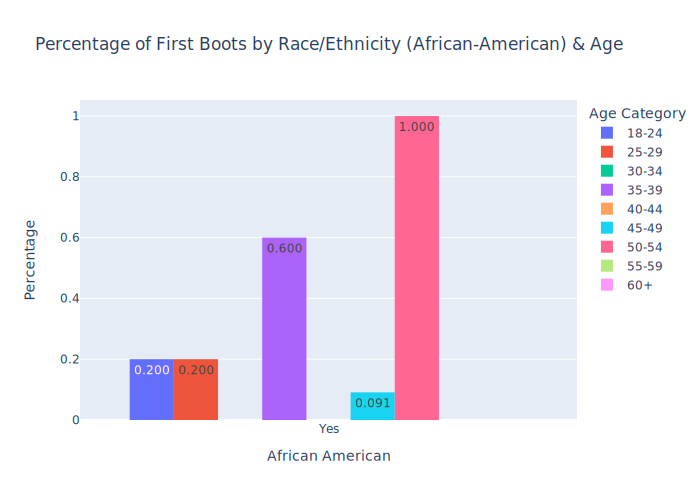

In [39]:
#graph to see first boots by race and age
fig = px.histogram(age_afam_first, x = "african_american", y= "proportion",  color = "age_category", title = "Percentage of First Boots by Race/Ethnicity (African-American) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

African-Americans make-up 18.6 percent of all first boots, but make up 60 percent of all boots 35-39, and all first boots between 50-54.
Although 45-49 is a age range with a disproportionately high number of first boots, black contestants avoid this fate.

C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



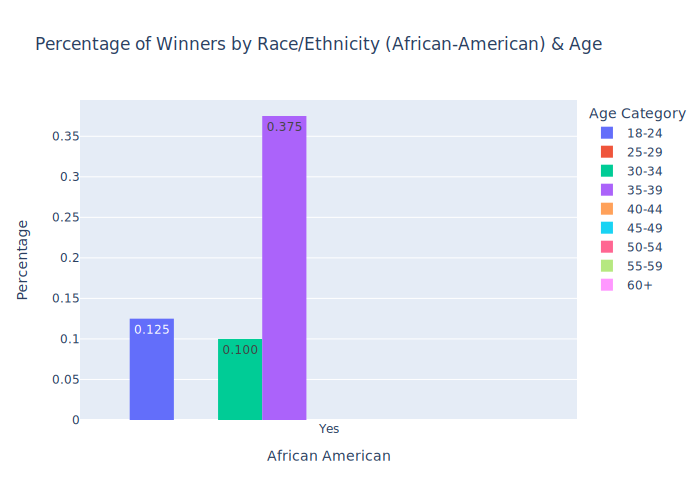

In [40]:
#graph of winners by race and age
fig = px.histogram(age_afam_winner, x = "african_american", y= "proportion",  color = "age_category", title = "Percentage of Winners by Race/Ethnicity (African-American) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"african_american" : "African American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [41]:
#create dataframe with the count and percentage of all contestants by race
count = all_cast["asian_american"].value_counts()
percentage = all_cast["asian_american"].value_counts(normalize = True)
as_am = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [42]:
#create dataframe with the count and percentage of first boots by race
count = first_boots["asian_american"].value_counts()
percentage = first_boots["asian_american"].value_counts(normalize = True)
as_am2 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [43]:
#create dataframe with the count and percentage of all winners by race
count = winners["asian_american"].value_counts()
percentage = winners["asian_american"].value_counts(normalize = True)
as_am3 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

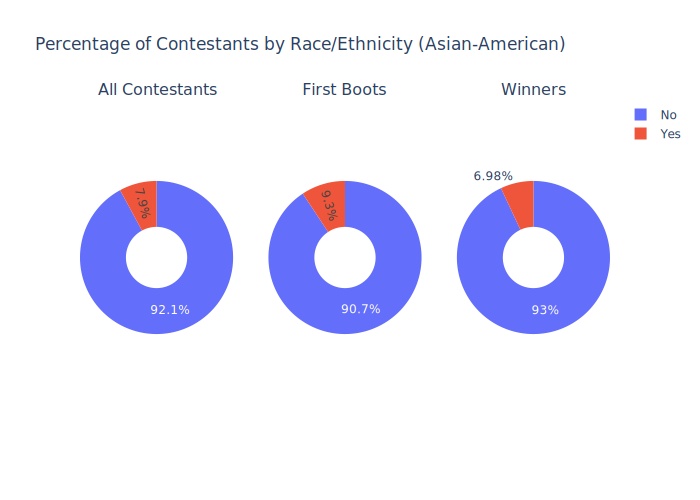

In [44]:
#create pie charts to show distrbution of asian-americans among entire cast, first boots, and winners
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles = ["All Contestants", "First Boots", "Winners"])

fig.add_trace(go.Pie( labels = as_am["asian_american"], values = as_am["percentage"], customdata = as_am["count"]),
              row=1, col=1)

fig.add_trace(go.Pie ( labels = as_am2["asian_american"] , values = as_am2["percentage"], customdata = as_am2["count"]),
              row = 1, col = 2)
fig.add_trace(go.Pie(labels = as_am3["asian_american"], values = as_am3["percentage"], customdata = as_am3["count"]),
                     row = 1, col = 3)
fig.update_traces(hole=0.4, hovertemplate = "<b>Asian_American?<b>: %{label}<br>"
                                    "<b>Proportion<b>: %{value:.3f}<br>"
                                    "<b>Count<b>: %{customdata}<br>"
                                     "<extra></extra>", textinfo = "percent")

fig.update_layout(title_text="Percentage of Contestants by Race/Ethnicity (Asian-American)")

In [45]:
#create dataframes with distribution of all cast, first boots, and winners by race and gender
df_all = all_cast.groupby(by="gender")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
df_all = df_all[df_all["asian_american"] == "Yes"]
df_first = first_boots.groupby(by="gender")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
df_first = df_first[df_first["asian_american"] == "Yes"]
df_winner = winners.groupby(by="gender")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
df_winner = df_winner[df_winner["asian_american"] == "Yes"]
   

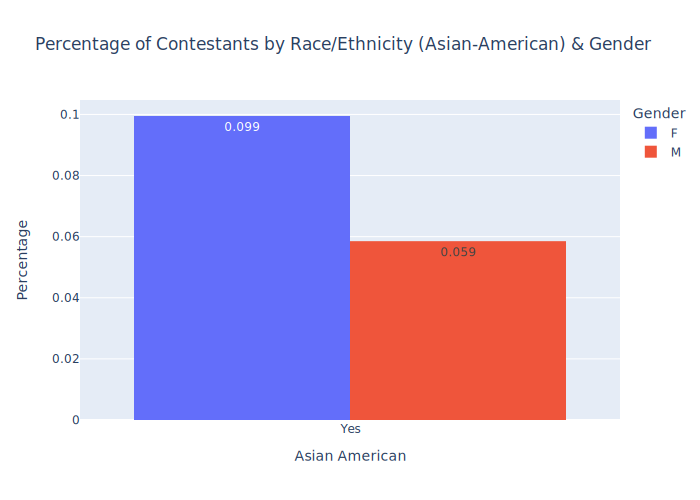

In [46]:
#create graph to show distribution of asian contestants by race and gender
fig = px.histogram(df_all, x = "asian_american", y= "proportion",  color = "gender", title = "Percentage of Contestants by Race/Ethnicity (Asian-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

Asian females are more common than their male counterparts. Asian women make up almost 10 percent of the female cast, while
Asian male make-up almost 6 percent of the male cast.

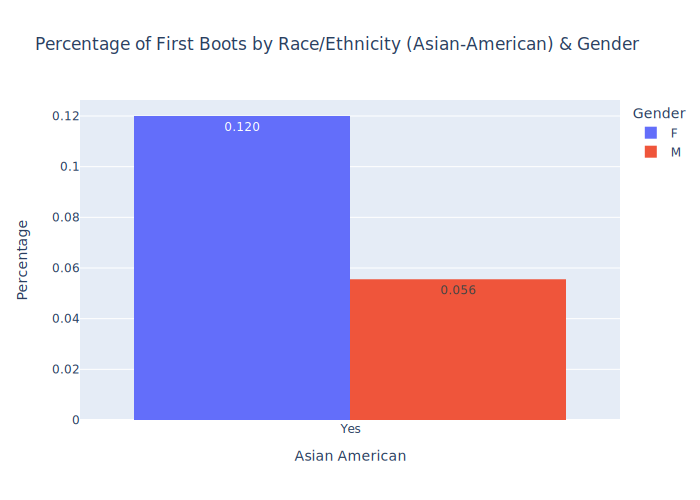

In [47]:
#first boots by race and gender
fig = px.histogram(df_first, x = "asian_american", y= "proportion",  color = "gender", title = "Percentage of First Boots by Race/Ethnicity (Asian-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

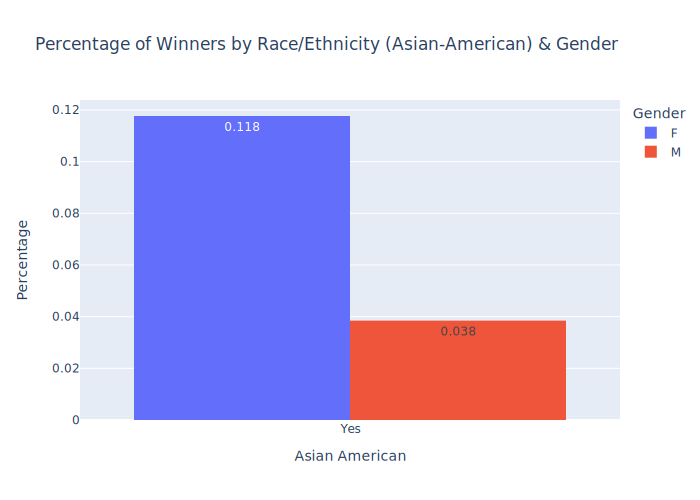

In [48]:
#create graph of winners by race and gender
fig = px.histogram(df_winner, x = "asian_american", y= "proportion",  color = "gender", title = "Percentage of Winners by Race/Ethnicity (Asian-American) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [49]:
#create graph showing distribution of race and age
age_all = all_cast.groupby(by="age_category")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
age_all = age_all[age_all["asian_american"] == "Yes"]
age_first = first_boots.groupby(by="age_category")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
age_first = age_first[age_first["asian_american"] == "Yes"]
age_winner = winners.groupby(by="age_category")["asian_american"].value_counts(normalize=True).to_frame().reset_index()
age_winner = age_winner[age_winner["asian_american"] == "Yes"]

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\862867274.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\862867274.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\862867274.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



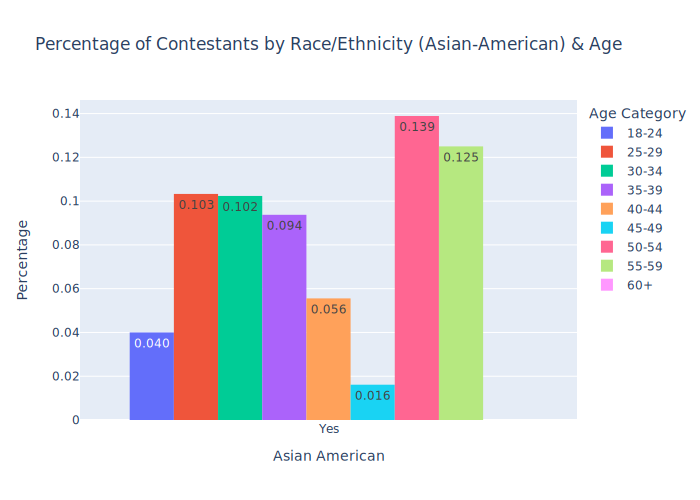

In [50]:
#graph showing distribution of asian-american contestants by age
fig = px.histogram(age_all, x = "asian_american", y= "proportion",  color = "age_category", title = "Percentage of Contestants by Race/Ethnicity (Asian-American) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

Asian contestants make up about 8 percent of the entire cast. Relative to total cast composition, they are underrepresented
among the 18-24 demographic, and among contestants in their 40s, but make up a larger percentage of contestants in their 50s. 

C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



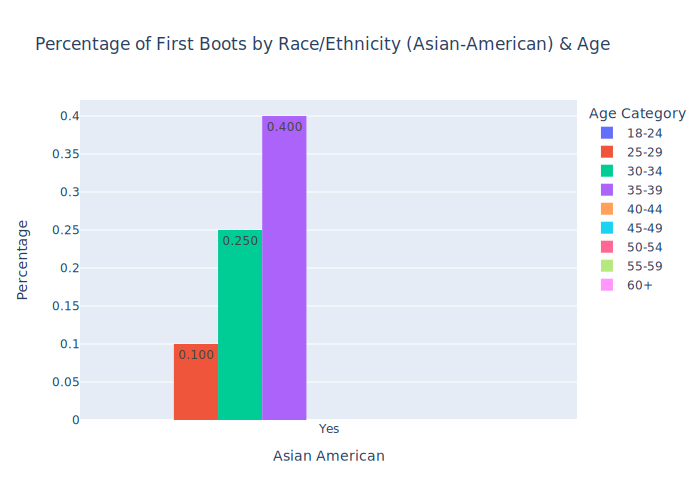

In [51]:
#graph showing first boots
fig = px.histogram(age_first, x = "asian_american", y= "proportion",  color = "age_category", title = "Percentage of First Boots by Race/Ethnicity (Asian-American) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



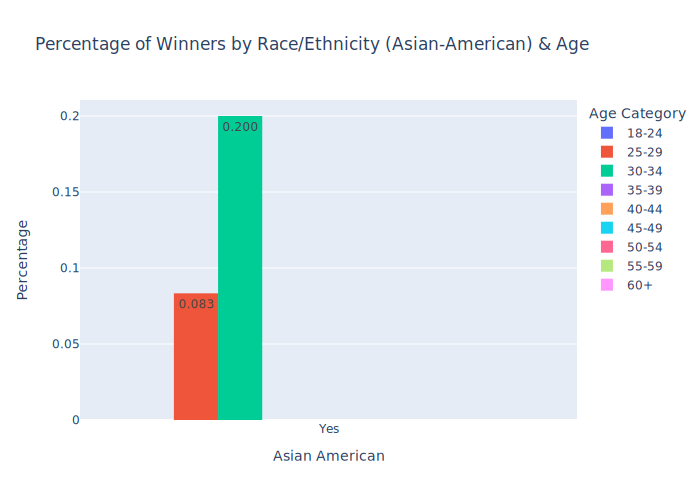

In [52]:
fig = px.histogram(age_winner, x = "asian_american", y= "proportion",  color = "age_category", title = "Percentage of Winners by Race/Ethnicity (Asian-American) & Age",
                  text_auto= '.3f', barmode = "group",  labels = {"asian_american" : "Asian American",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [53]:
#create dataframe with the count and percentage of all contestants by race
count = all_cast["latin_american"].value_counts()
percentage = all_cast["latin_american"].value_counts(normalize = True)
lat_am = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [54]:
#create dataframe with the count and percentage of all first boots by race
count = first_boots["latin_american"].value_counts()
percentage = first_boots["latin_american"].value_counts(normalize = True)
lat_am2 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [55]:
#create dataframe with the count and percentage of all winners by race
count = winners["latin_american"].value_counts()
percentage = winners["latin_american"].value_counts(normalize = True)
lat_am3 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

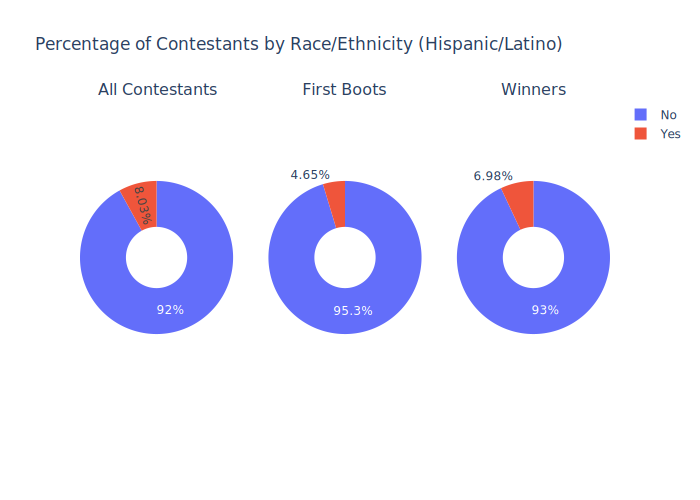

In [56]:
#create pie charts showing distribution of hispanic-americans among all contestants, first boots, and winners
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles = ["All Contestants", "First Boots", "Winners"])

fig.add_trace(go.Pie( labels = lat_am["latin_american"], values = lat_am["percentage"], customdata = lat_am["count"]),
              row=1, col=1)

fig.add_trace(go.Pie ( labels = lat_am2["latin_american"] , values = lat_am2["percentage"], customdata = lat_am2["count"]),
              row = 1, col = 2)
fig.add_trace(go.Pie(labels = lat_am3["latin_american"], values = lat_am3["percentage"], customdata = lat_am3["count"]),
                     row = 1, col = 3)
fig.update_traces(hole=0.4, hovertemplate = "<b>Hispanic/Latino?<b>: %{label}<br>"
                                    "<b>Proportion<b>: %{value:.3f}<br>"
                                    "<b>Count<b>: %{customdata}<br>"
                                     "<extra></extra>", textinfo = "percent")

fig.update_layout(title_text="Percentage of Contestants by Race/Ethnicity (Hispanic/Latino)")

Hispanic/Latinos make up around 8 percent of the cast, under 5 percent of first boots, and around 7 percent of winners.

In [57]:
#create dataframes grouping by gender and race
df_all = all_cast.groupby(by="gender")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
df_all = df_all[df_all["latin_american"] == "Yes"]
df_first = first_boots.groupby(by="gender")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
df_first = df_first[df_first["latin_american"] == "Yes"]
df_winner = winners.groupby(by="gender")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
df_winner = df_winner[df_winner["latin_american"] == "Yes"]

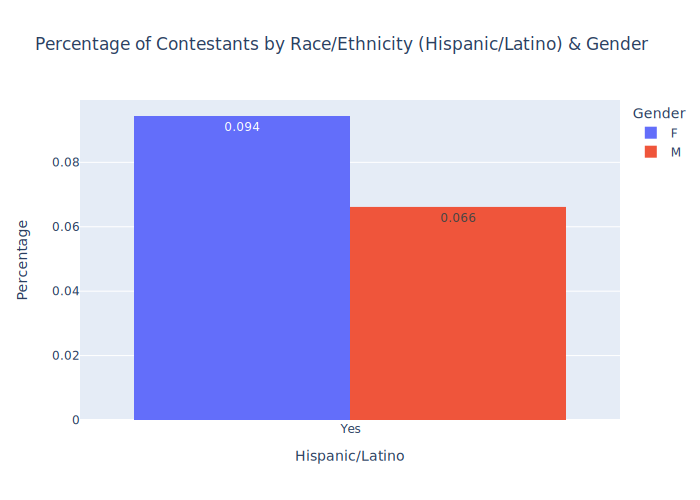

In [58]:
#create graph showing distribution by race and gender
fig = px.histogram(df_all, x = "latin_american", y= "proportion",  color = "gender", title = "Percentage of Contestants by Race/Ethnicity (Hispanic/Latino) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

Hispanic/Latino women are more represented than their male counterparts. They make up a little over 9 percent of the female cast while
Hispanic/Latino men make up under 7 percent of the male cast.

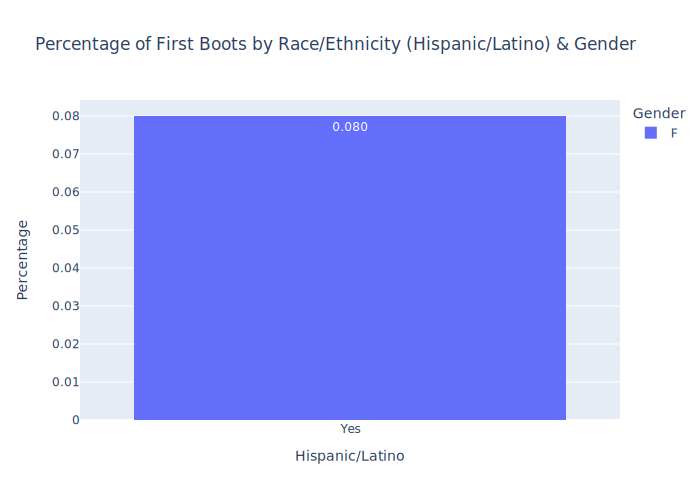

In [59]:

fig = px.histogram(df_first, x = "latin_american", y= "proportion",  color = "gender", title = "Percentage of First Boots by Race/Ethnicity (Hispanic/Latino) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

A Hispanic/Latino male has never been voted out first. Hispanic/Latino women make-up 8 percent of the female first boots.

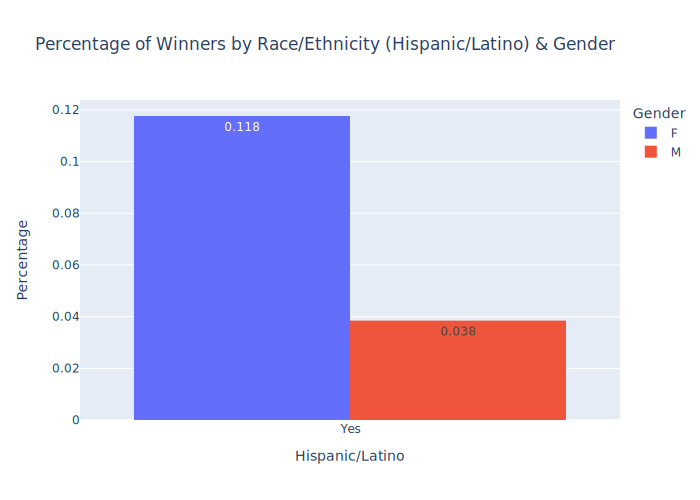

In [60]:

fig = px.histogram(df_winner, x = "latin_american", y= "proportion",  color = "gender", title = "Percentage of Winners by Race/Ethnicity (Hispanic/Latino) & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [61]:
#create dataframes by race and age
age_all = all_cast.groupby(by="age_category")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
age_all = age_all[age_all["latin_american"] == "Yes"]
age_first = first_boots.groupby(by="age_category")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
age_first = age_first[age_first["latin_american"] == "Yes"]
age_winner = winners.groupby(by="age_category")["latin_american"].value_counts(normalize=True).to_frame().reset_index()
age_winner = age_winner[age_winner["latin_american"] == "Yes"]

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\2355243436.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\2355243436.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\adaml\AppData\Local\Temp\ipykernel_1472\2355243436.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



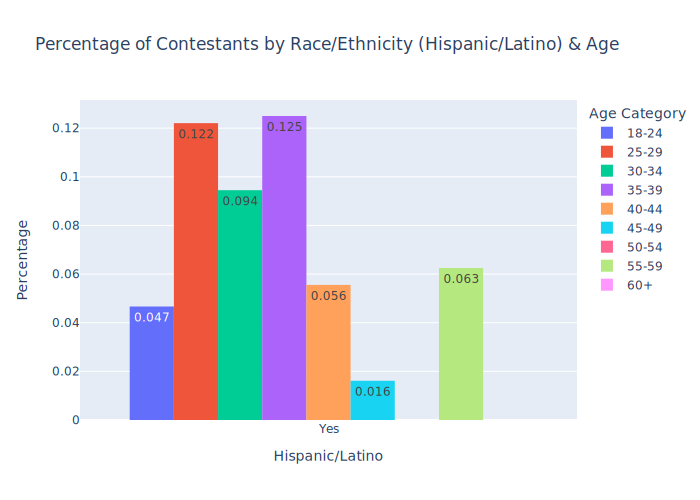

In [62]:
#graph showing distribution of Hispanic/Latino contestants by age
fig = px.histogram(age_all, x = "latin_american", y= "proportion",  color = "age_category", title = "Percentage of Contestants by Race/Ethnicity (Hispanic/Latino) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

Relative to total cast composition (8 percent), Hispanics are underrepresented among the 18-24 and 45-49 demographics, but make up
a greater percentage of contestants 25-39.

C:\Users\adaml\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



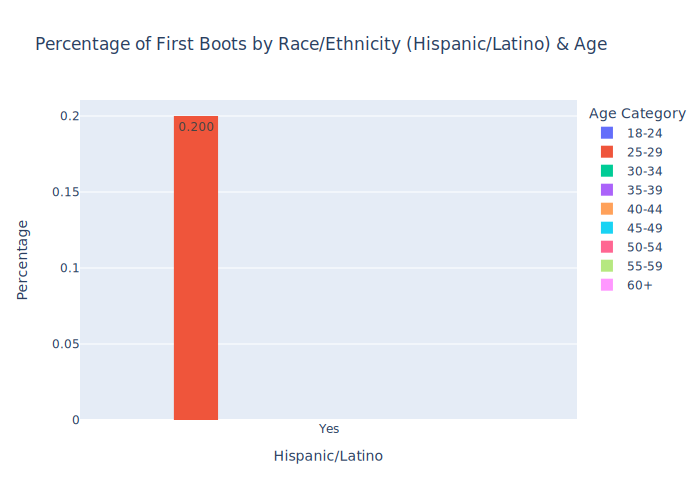

In [63]:
fig = px.histogram(age_first, x = "latin_american", y= "proportion",  color = "age_category", title = "Percentage of First Boots by Race/Ethnicity (Hispanic/Latino) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

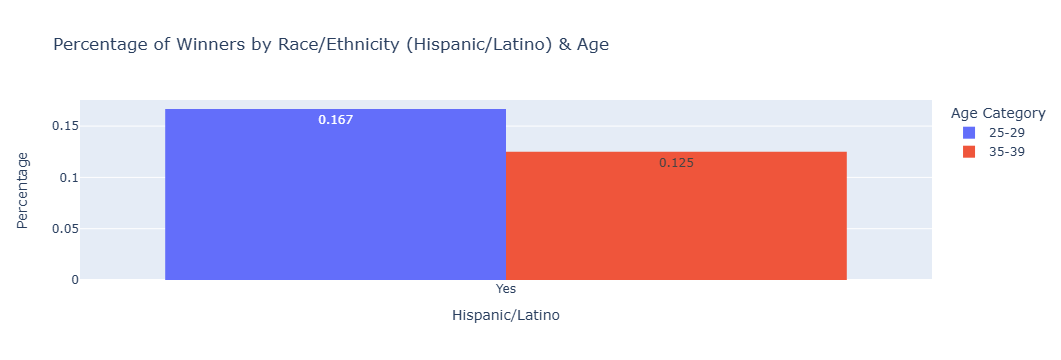

In [45]:
fig = px.histogram(age_winner, x = "latin_american", y= "proportion",  color = "age_category", title = "Percentage of Winners by Race/Ethnicity (Hispanic/Latino) & Age",
                  text_auto = '.3f', barmode = "group",  labels = {"latin_american" : "Hispanic/Latino",
                                                                                       "age_category" : "Age Category"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [49]:
#create dataframe with the count and percentage of all contestants by lgbt
count = all_cast["lgbt"].value_counts()
percentage = all_cast["lgbt"].value_counts(normalize = True)
lgbt = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [50]:
#create dataframe with the count and percentage of all first boots by lgbt
count = first_boots["lgbt"].value_counts()
percentage = first_boots["lgbt"].value_counts(normalize = True)
lgbt2 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

In [51]:
#create dataframe with the count and percentage of all winners by lgbt
count = winners["lgbt"].value_counts()
percentage = winners["lgbt"].value_counts(normalize = True)
lgbt3 = pd.concat([count,percentage], axis=1, keys=['count', 'percentage']).reset_index()

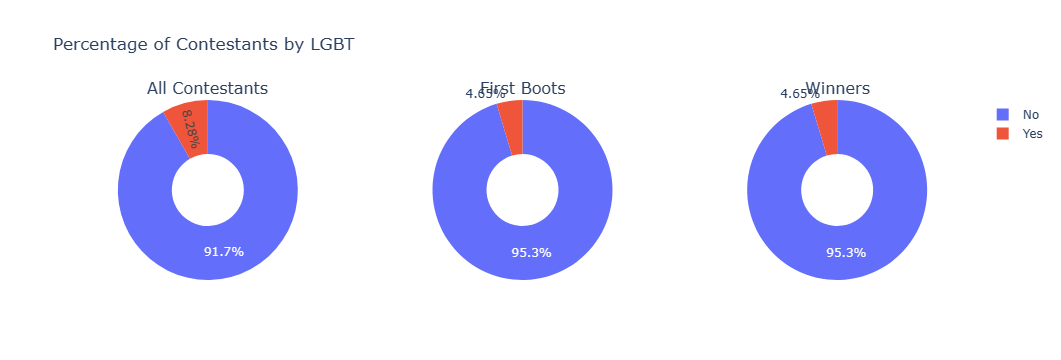

In [55]:
#create pie charts showing distribution of lgbt contestants 
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles = ["All Contestants", "First Boots", "Winners"])

fig.add_trace(go.Pie( labels = lgbt["lgbt"], values = lgbt["percentage"], customdata = lgbt["count"]),
              row=1, col=1)

fig.add_trace(go.Pie ( labels = lgbt2["lgbt"] , values = lgbt2["percentage"], customdata = lgbt2["count"]),
              row = 1, col = 2)
fig.add_trace(go.Pie(labels = lgbt3["lgbt"], values = lgbt3["percentage"], customdata = lgbt3["count"]),
                     row = 1, col = 3)
fig.update_traces(hole=0.4, hovertemplate = "<b>LGBT?<b>: %{label}<br>"
                                    "<b>Proportion<b>: %{value:.3f}<br>"
                                    "<b>Count<b>: %{customdata}<br>"
                                     "<extra></extra>", textinfo = "percent")

fig.update_layout(title_text="Percentage of Contestants by LGBT")

In [56]:
#create dataframes to showing distribution of lgbt contestants by gender
df_all = all_cast.groupby(by="gender")["lgbt"].value_counts(normalize=True).to_frame().reset_index()
df_all = df_all[df_all["lgbt"] == "Yes"]
df_first = first_boots.groupby(by="gender")["lgbt"].value_counts(normalize=True).to_frame().reset_index()
df_first = df_first[df_first["lgbt"] == "Yes"]
df_winner = winners.groupby(by="gender")["lgbt"].value_counts(normalize=True).to_frame().reset_index()
df_winner = df_winner[df_winner["lgbt"] == "Yes"]

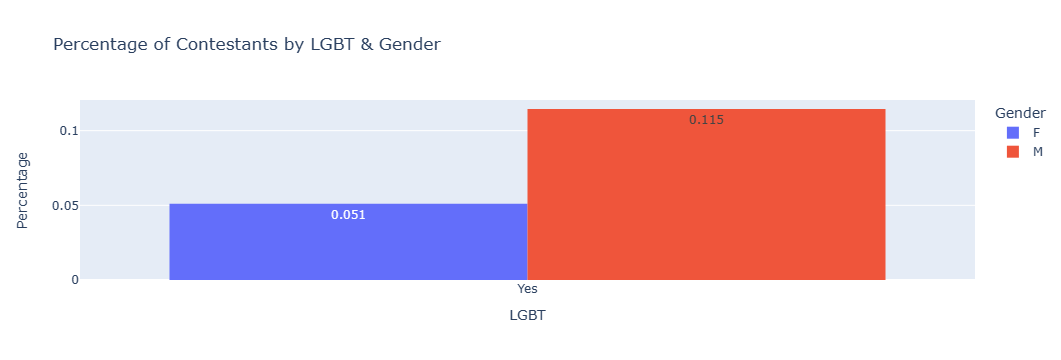

In [57]:
fig = px.histogram(df_all, x = "lgbt", y= "proportion",  color = "gender", title = "Percentage of Contestants by LGBT & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"lgbt" : "LGBT",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

LGBT contestants are more likely to be male. Female LGBT contestants make up about 5 percent of the female cast, while LGBT men
make up over 11 percent of male contestants.

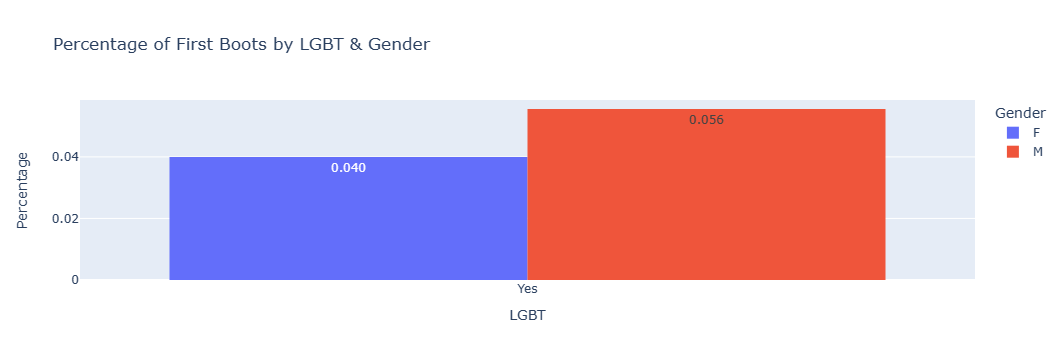

In [58]:
fig = px.histogram(df_first, x = "lgbt", y= "proportion",  color = "gender", title = "Percentage of First Boots by LGBT & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"lgbt" : "LGBT",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

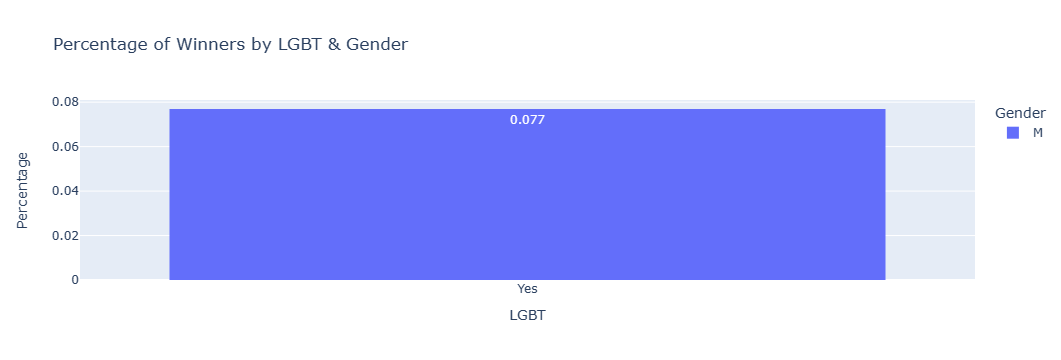

In [60]:
fig = px.histogram(df_winner, x = "lgbt", y= "proportion",  color = "gender", title = "Percentage of Winners by LGBT & Gender",
                  text_auto = '.3f', barmode = "group",  labels = {"lgbt" : "LGBT",
                                                                                       "gender" : "Gender"})
fig.update_layout(yaxis_title="Percentage") 
fig.show()

In [87]:
#create dataframes to show geographic distribution among contestants
loc_all = all_cast["state"].value_counts(normalize=True).round(3).head(10).to_frame().reset_index()

In [88]:
loc_first = first_boots["state"].value_counts(normalize=True).round(3).head(10).to_frame().reset_index()

In [89]:
loc_winner = winners["state"].value_counts(normalize=True).head(10).round(3).head(10).to_frame().reset_index()

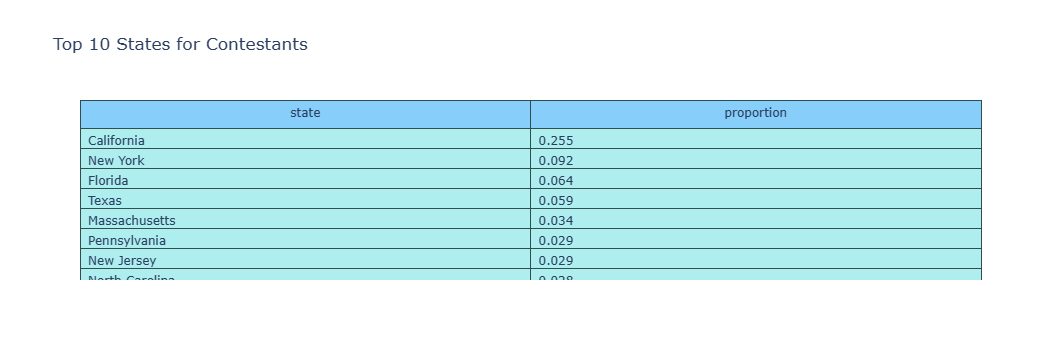

In [98]:
#make table for top 10 states for all contestants
fig = go.Figure(data=[go.Table(
    header=dict(values=list(loc_all.columns),
                fill_color='lightskyblue',
                line_color='darkslategray',
                align='center'),
    cells=dict(values=[loc_all.state, loc_all.proportion],
               line_color='darkslategray',
               fill_color='paleturquoise',
               align='left'))])
fig.update_layout(title_text = "Top 10 States for Contestants")
fig.show()

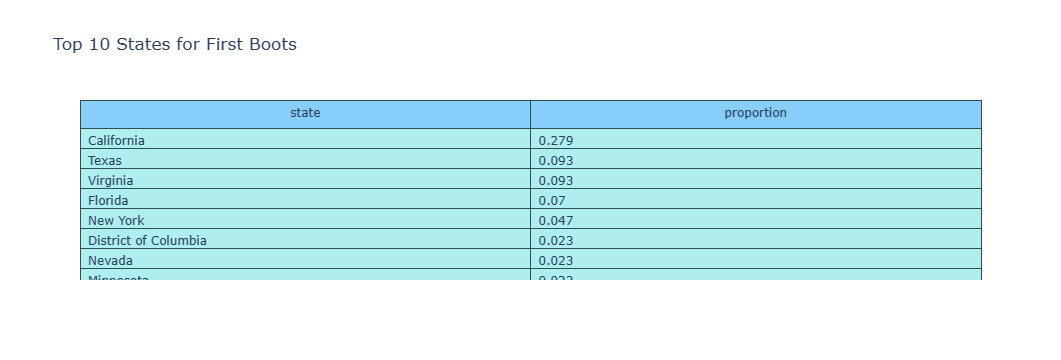

In [99]:
#table for top 10 states of first boots
fig = go.Figure(data=[go.Table(
    header=dict(values=list(loc_first.columns),
                fill_color='lightskyblue',
                line_color='darkslategray',
                align='center'),
    cells=dict(values=[loc_first.state, loc_first.proportion],
               line_color='darkslategray',
               fill_color='paleturquoise',
               align='left'))])
fig.update_layout(title_text = "Top 10 States for First Boots")
fig.show()

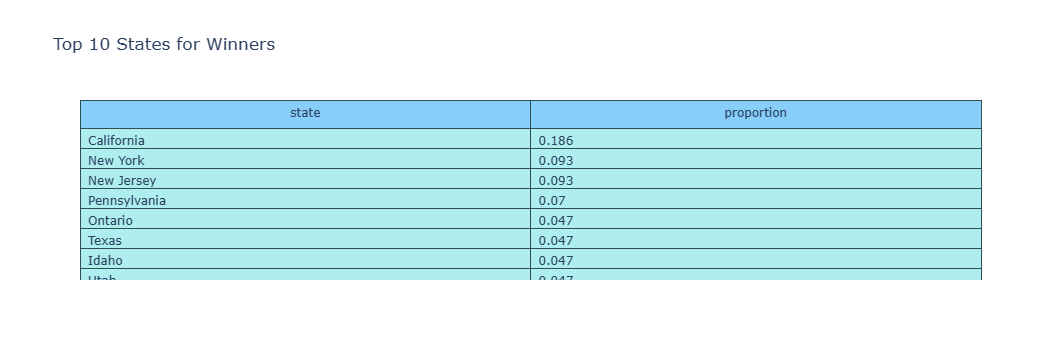

In [100]:
#Top 10 states for winners
fig = go.Figure(data=[go.Table(
    header=dict(values=list(loc_winner.columns),
                fill_color='lightskyblue',
                line_color='darkslategray',
                align='center'),
    cells=dict(values=[loc_winner.state, loc_winner.proportion],
               line_color='darkslategray',
               fill_color='paleturquoise',
               align='left'))])
fig.update_layout(title_text = "Top 10 States for Winners")
fig.show()

In [ ]:
New Jersey performs well; 9 percent of winners, but only 3 percent of the total cast.